In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Parsing and cleaning

In [4]:
with open('data_v2.json', encoding="utf-8") as json_file:
    data = json.load(json_file)
df = pd.json_normalize(data)

In [5]:
df.dtypes

Name                               object
CVR                                object
BusinessAddress                    object
StartDate                          object
Status                             object
IndustryCode                       object
IndustryName                       object
Area                               object
AreaCode                           object
DirectorName                       object
DirectorAddress                    object
DirectorId                         object
RegisteredCapital                 float64
RegisteredCapitalCurrency          object
NumPeople                         float64
NumCars                           float64
DistanceToBusinessMeters          float64
DistanceToBusinessDriveSeconds    float64
dtype: object

In [6]:
df[df["DistanceToBusinessMeters"] > 452000]

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,DirectorName,DirectorAddress,DirectorId,RegisteredCapital,RegisteredCapitalCurrency,NumPeople,NumCars,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds
34,A Day's March Shirts & Staples Denmark ApS,40381228,Kronprinsensgade 7,2019-03-27,NORMAL,477110,Tøjforretninger,København,101,Carl Marcus Oluf Gårdö,"Tulevägen 9, 182 63 Djursholm, Sverige",4008027049,50000.0,DKK,1.0,0.0,663675.0,25623.0
44,SHURGARD DENMARK ApS,30202503,"C/O Harbour House, Sundkrogsgade 21",2007-01-16,NORMAL,521000,Oplagrings- og pakhusvirksomhed,København,101,Marc Pierre Francois Oursin,"Breedveld 29, 1702 Groot-Bijgaarden, Belgien",4004281240,380000.0,DKK,1.0,7.0,928997.0,38646.0
68,ANDREWS ASSOCIATES ApS,34221782,"C/O CROWE, Rygårds Allé 104",2012-01-25,NORMAL,702200,Virksomhedsrådgivning og anden rådgivning om d...,København,101,Sharon Helen Diane Andrews,"Swallows Court, Randwick, Stroud, Gloucestersh...",4008093354,80000.0,DKK,0.0,2.0,1441264.0,59595.0
75,RALPH LAUREN DENMARK ApS,30907299,"C/O Bech-Bruun Advokatfirma, Langelinie Allé 35",2007-10-01,NORMAL,477110,Tøjforretninger,København,101,Carmel Ann Pedatella,"RUE SAINT- VICTOR 22, , 1227 CAROUGE (GE), Sch...",4007713120,127019.0,DKK,5.0,4.0,1410792.0,55793.0
97,JONES LANG LASALLE SERVICES ApS,29846359,"C/O Bech-Bruun advokatfirma, Langelinie Allé 35",2006-09-01,NORMAL,683210,Administration af fast ejendom på kontraktbasis,København,101,Maciej Czubaszek,"AL.ST.Zjednoczonych, 72 M.372, 04-036 Warszawa...",4008528959,127000.0,DKK,0.0,2.0,1027865.0,41987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,Nordic Health Institute ApS,38218077,"Rosenørns Alle 31, 2.",2016-11-29,NORMAL,869090,Sundhedsvæsen i øvrigt i.a.n.,Frederiksberg,147,Bård Baldishol,"Hiltonåsen 24, 1341 Slependen, Norge",4008920727,98836.0,DKK,0.0,0.0,630846.0,25474.0
1524,SILHOUETTE DANMARK A/S,14742638,"C/O Bech-Bruuun, Langelinie Allé 35",1990-09-01,NORMAL,464800,"Engroshandel med ure, smykker og guld- og sølv...",København,101,Jarna Maria Pere,Sverige,4008871727,2000000.0,DKK,0.0,0.0,721170.0,30752.0
1539,A-SOLUTIONS A/S,27047947,"Lyskær 8A, st. th",2003-02-26,NORMAL,620100,Computerprogrammering,Herlev,163,Peter Nicolai Weiss,"Zahra Breeze 3A, 720, Dubai, Forenede Arabisk...",4004156543,550000.0,DKK,0.0,0.0,6693944.0,248561.0
1543,A-SAFE ApS,35252932,"Rugvænget 46A, 1.",2013-06-01,NORMAL,467400,"Engroshandel med isenkram, varmeanlæg og tilbehør",Høje Taastrup,169,Luke Smith,"Wynsar, Albert Promenade, Halifax, HX3 0HZ, St...",4008655700,200000.0,DKK,0.0,4.0,1568056.0,64381.0


In [7]:
nan_count = df.isna().sum()

print(nan_count)

Name                                0
CVR                                 0
BusinessAddress                     0
StartDate                           0
Status                              0
IndustryCode                        0
IndustryName                        0
Area                                0
AreaCode                            0
DirectorName                        0
DirectorAddress                    56
DirectorId                          0
RegisteredCapital                   0
RegisteredCapitalCurrency           0
NumPeople                          56
NumCars                            56
DistanceToBusinessMeters          123
DistanceToBusinessDriveSeconds    123
dtype: int64


In [8]:
df

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,DirectorName,DirectorAddress,DirectorId,RegisteredCapital,RegisteredCapitalCurrency,NumPeople,NumCars,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds
0,KL-A ApS,27223966,Teglstrupvej 34,2003-06-25,NORMAL,432100,El-installation,København,101,Kim Larsen,"Teglstrupvej 34, 2100 København Ø",4000467158,125000.0,DKK,0.0,0.0,0.0,0.0
1,A-Evidence ApS,40054626,"C/O Tove Holm-Larsen, Njalsgade 76",2018-11-28,NORMAL,620100,Computerprogrammering,København,101,Tove Holm-Larsen,"Sommervej 9, 3520 Farum",4000669314,57223.0,DKK,1.0,0.0,24510.0,1814.0
2,S-A ApS,30238648,"Amagertorv 33, 4.",2007-01-01,NORMAL,711100,Arkitektvirksomhed,København,101,Johnny Svendborg Andersen,"Wildersgade 48, 3. th, 1408 København K",4000366133,125000.0,DKK,8.0,11.0,3173.0,835.0
3,Tandlægerne Borups Alle ApS,40300481,"Borups Allé 201, 2. tv",2019-02-25,NORMAL,862300,Praktiserende tandlæger,København,101,Birthe Hastrup,"Birkevej 19, 3450 Allerød",4000054020,50000.0,DKK,0.0,1.0,25037.0,1213.0
4,A & O HULTQUIST ApS,15006935,"Amaliegade 34A, st. th",1991-01-01,NORMAL,464930,Engroshandel med kufferter og lædervarer,København,101,Niels Oluf Hultquist Andersen,"Gl Strandvej 43, 3050 Humlebæk",4004116710,200000.0,DKK,0.0,5.0,38779.0,2138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,A.A. EL-CENTER A/S,66358119,Krondalvej 7,1980-10-29,NORMAL,432100,El-installation,Rødovre,175,Per Sandfeld,"Sofielundsvej 52A, 2600 Glostrup",4003935007,500000.0,DKK,0.0,1.0,4805.0,544.0
1570,FLEX-A ApS,33498292,Toftebakken 2G,2011-02-11,NORMAL,452010,Autoreparationsværksteder mv.,Rudersdal,230,Stig John Petersen,"Brønshøjvej 53, st., 2700 Brønshøj",4004173365,120000.0,DKK,0.0,11.0,301817.0,11687.0
1571,S.A.A. ApS,36046090,Valby Langgade 74,2014-07-15,NORMAL,563000,"Cafeér, værtshuse, diskoteker mv.",København,101,Abed Bakr,"Valby Langgade 76, 2., 2500 Valby",4000237697,50000.0,DKK,0.0,14.0,11.0,3.0
1572,A-A Invest ApS,35141928,"C/O Jun Zhang, Ellekrogen 5, Trørød",2013-03-11,NORMAL,649900,Anden finansiel formidling undtagen forsikring...,Rudersdal,230,Jun Zhang,"Ellekrogen 5, Trørød, 2950 Vedbæk",4004176206,80000.0,DKK,0.0,0.0,0.0,0.0


In [9]:
# drop nan values because ....
df = df.dropna()

([<matplotlib.patches.Wedge at 0x218f4f6fcd0>,
 [Text(-0.6282715323516475, 1.0223868551759225, 'Other'),
  Text(-0.4881631929973591, -1.096219274143008, 'El-installation'),
  Text(-0.31455469718570284, -1.1580394390859108, 'Computerprogrammering'),
  Text(-0.11543886188638079, -1.194434539506614, 'Arkitektvirksomhed'),
  Text(0.02987548152048913, -1.1996280488567774, 'Praktiserende tandlæger'),
  Text(0.17475116922929954, -1.1872076603749626, 'Cafeér, værtshuse, diskoteker mv.'),
  Text(0.4111021654133729, -1.127384144643003, 'Restauranter'),
  Text(0.6127047629582664, -1.0317910997136264, 'Bogføring og revision: skatterådgivning'),
  Text(0.8162525429836609, -0.8796202510587775, 'Virksomhedsrådgivning og anden rådgivning om driftsledelse'),
  Text(0.9816974176433388, -0.6901233079619901, 'Tøjforretninger'),
  Text(1.0530165715120197, -0.575461640877193, 'VVS- og blikkenslagerforretninger'),
  Text(1.1278284425032903, -0.40988169546907366, 'Konsulentbistand vedrørende informationstekno

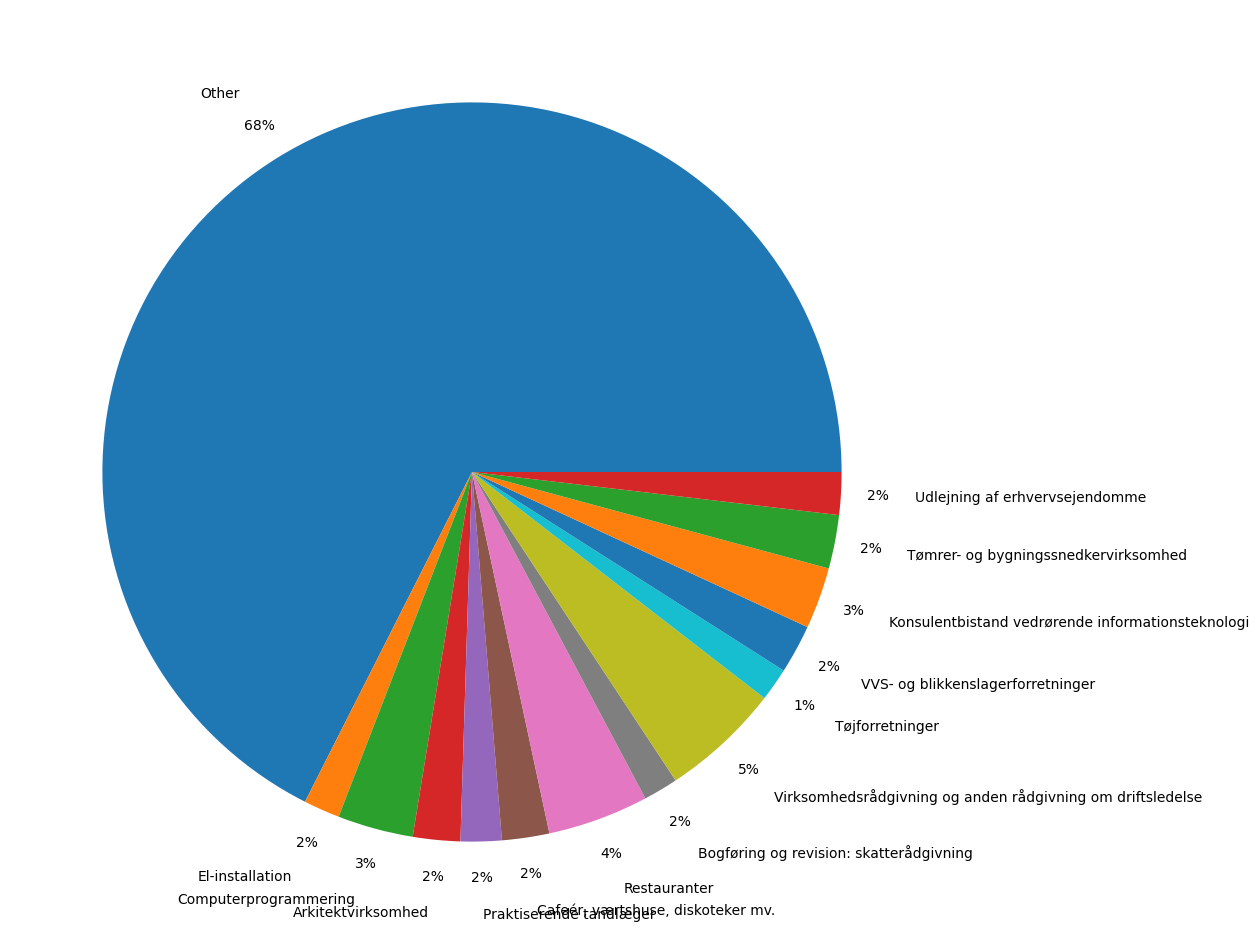

In [10]:
labels = ["Other"]
counts = [0]

for industry in df["IndustryName"].unique():
    if len(df[df['IndustryName'] == industry]) < 20:
        counts[0] = counts[0] +len(df[df['IndustryName'] == industry])
    else:
        labels.append(industry)
        counts.append(len(df[df['IndustryName'] == industry]))
plt.rcParams["figure.figsize"] = (16,12)
plt.pie(counts, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

In [13]:
df[df["RegisteredCapital"] < 40000]

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,DirectorName,DirectorAddress,DirectorId,RegisteredCapital,RegisteredCapitalCurrency,NumPeople,NumCars,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds


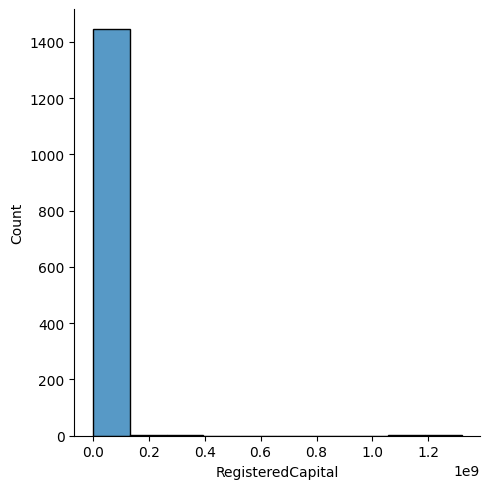

In [11]:
sns.displot(df, x="RegisteredCapital", bins=10)

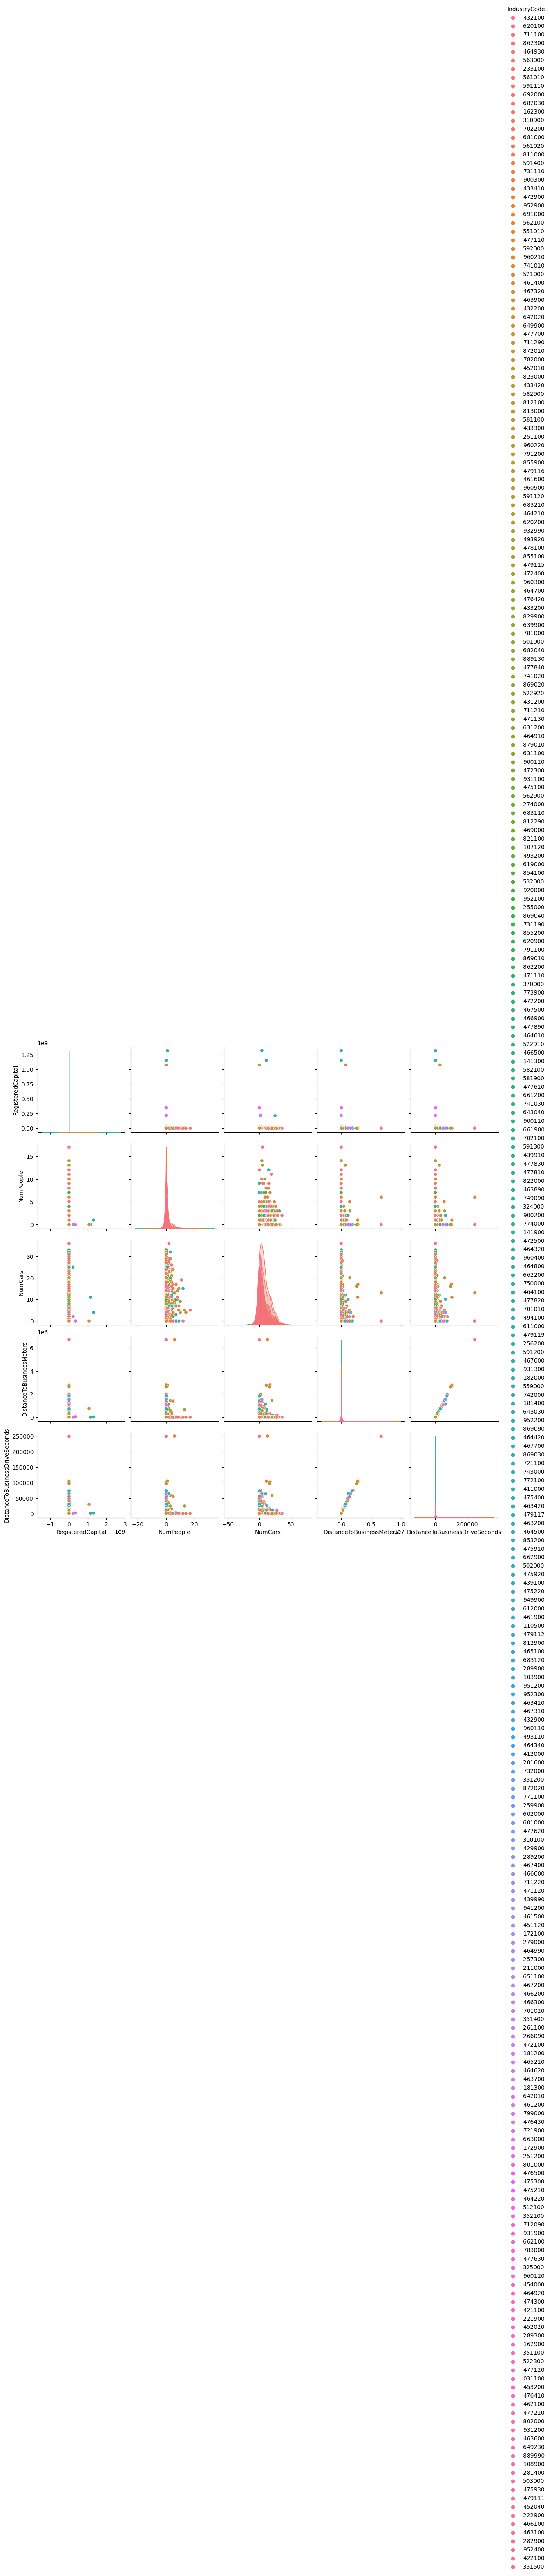

In [16]:
sns.pairplot(df, hue="IndustryCode")

In [14]:
ax = sns.swarmplot(data=df, x="RegisteredCapital", y="Area")
ax.set(ylabel="")


KeyboardInterrupt



Error in callback <function flush_figures at 0x00000218F5D0BEB0> (for post_execute):



KeyboardInterrupt



In [15]:
len(df["IndustryCode"].unique())

299